## HW3

### Ahmad Hojatimalekshah

### Load Libraries

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from sympy import *
from numpy.linalg import inv
from tabulate import tabulate
from numpy import ma
from matplotlib import ticker, cm
import time
from scipy.optimize import fmin
from scipy.stats import *

### Q.1

#### Reading the Data

**`eyediff` : pixel intensity differences in the eye region**


**The response variable is `"match"`, with match=1 indicating that the probe image was correctly matched to the
other image of the same person and match=0 indicating that the probe was incorrectly matched to an image of someone else.**

In [2]:
data = pd.read_table("facerecognition.dat", sep="\s+")

In [3]:
data.head()

,match,eyediff,nosecheekdiff,variabilityratio
0,1,0.009683,0.027914,1.086204
1,1,0.027614,0.017821,0.989840
2,1,0.015367,0.025832,1.010983
3,1,0.013371,0.024048,1.012724
4,1,0.011428,0.017801,1.044396


### Iteratively Reweighted Least Squares

In [4]:
def IRLS(y,z,n,Beta0):
    Z = np.vstack((np.ones(len(z)),z))
    header=['Iteration,t','\u03B2\u207D\u1d57\u207E', '-l\u2033(\u03B2\u207D\u1d57\u207E)\u207B\u00B9']
    Beta = np.zeros((2,n))
    Beta[0,0] = Beta0
    for i in range(1,n):
        p = 1-1/(1+np.exp(np.dot(Z.transpose(),Beta[:,i-1])))
        l_prime = np.dot(Z, (y-p))
        W = np.diag(p*(1-p))
        l_zegond = -Z.dot(W).dot(Z.transpose())
        Beta[:,i] = Beta[:,i-1]-np.dot(inv(l_zegond),l_prime)
        table = [[i-1,Beta[:,i-1],-inv(l_zegond)]]
        print(tabulate(table,headers=header))
    #return Beta , -inv(l_zegond)
    
    

#### a.

In [5]:
Beta = IRLS(data['match'],data['eyediff'],10,0.95913)
Beta

  Iteration,t  β⁽ᵗ⁾               -l″(β⁽ᵗ⁾)⁻¹
-------------  -----------------  ---------------------------
            0  [0.95913 0.     ]  [[ 0.01096355 -0.11774922]
                                   [-0.11774922  2.24636741]]
  Iteration,t  β⁽ᵗ⁾                         -l″(β⁽ᵗ⁾)⁻¹
-------------  ---------------------------  ---------------------------
            1  [  1.72028763 -13.90963144]  [[ 0.01376919 -0.14444378]
                                             [-0.14444378  2.43426036]]
  Iteration,t  β⁽ᵗ⁾                         -l″(β⁽ᵗ⁾)⁻¹
-------------  ---------------------------  ---------------------------
            2  [  1.75721969 -13.38389891]  [[ 0.01399076 -0.14439871]
                                             [-0.14439871  2.40178607]]
  Iteration,t  β⁽ᵗ⁾                         -l″(β⁽ᵗ⁾)⁻¹
-------------  ---------------------------  ---------------------------
            3  [  1.75870063 -13.40003398]  [[ 0.01400062 -0.1445039 ]
                            

#### b.

In [6]:
Beta = IRLS(data['match'],data['eyediff'],10,0)
Beta

  Iteration,t  β⁽ᵗ⁾     -l″(β⁽ᵗ⁾)⁻¹
-------------  -------  ---------------------------
            0  [0. 0.]  [[ 0.00878375 -0.09433803]
                         [-0.09433803  1.79973903]]
  Iteration,t  β⁽ᵗ⁾                         -l″(β⁽ᵗ⁾)⁻¹
-------------  ---------------------------  ---------------------------
            1  [  1.5016127  -11.14408376]  [[ 0.01246462 -0.12936371]
                                             [-0.12936371  2.21900238]]
  Iteration,t  β⁽ᵗ⁾                         -l″(β⁽ᵗ⁾)⁻¹
-------------  ---------------------------  ---------------------------
            2  [  1.74440309 -13.26669118]  [[ 0.01390619 -0.14355394]
                                             [-0.14355394  2.39141906]]
  Iteration,t  β⁽ᵗ⁾                         -l″(β⁽ᵗ⁾)⁻¹
-------------  ---------------------------  ---------------------------
            3  [  1.75865273 -13.3995696 ]  [[ 0.0140003  -0.14450065]
                                             [-0.14450065  2.4031256

#### c.

#### Lets define a loglikelihood function

In [7]:
def loglklihd(y,z,Beta0,Beta1):
    Z = np.vstack((np.ones(len(z)),z))
    #Beta = np.vstack((Beta0,Beta1))
    X, Y = np.meshgrid(Beta0, Beta1)
    n = len(Beta0)
    x0 = np.reshape(X,n**2)
    y0 = np.reshape(Y,n**2)
    Beta = np.vstack((x0,y0))
    l = np.zeros(n**2)
    for i in range(1,n**2):
        p = 1-1/(1+np.exp(np.dot(Z.transpose(),Beta[:,i-1])))
        b = -np.log(1-p)
        l[i] = y.transpose().dot(Z.transpose()).dot(Beta[:,i-1])-sum(b)
    return np.reshape(l,(n,n))
        

#### Initial Values

In [8]:
Beta0 = np.linspace(-5,5,100)
Beta1 = np.linspace(-50,50,100)
X, Y = np.meshgrid(Beta0, Beta1)

In [9]:
l =loglklihd(data['match'],data['eyediff'],Beta0,Beta1)

#### Contour Plot

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: linewidths is ignored by contourf
  This is separate from the ipykernel package so we can avoid doing imports until


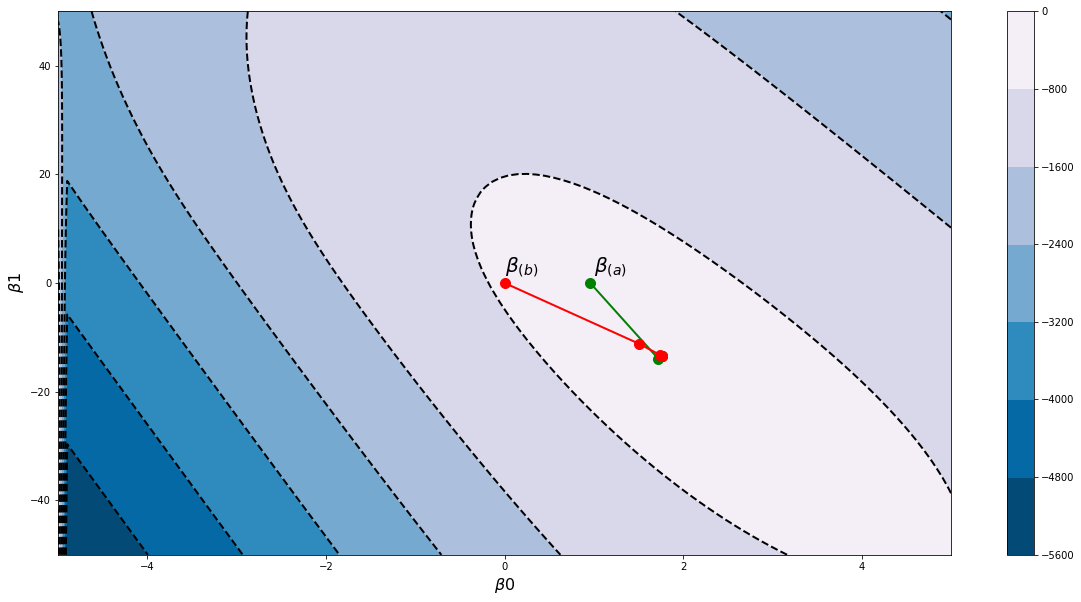

In [10]:
plt.figure(figsize = (20,10))
plt.contour(X, Y, l, colors='black', linestyles='dashed', linewidths=2)
cs = plt.contourf(X, Y, l, linewidths=1,cmap=cm.PuBu_r)
plt.ylabel(r'$\beta1$',weight='bold',fontsize=16)
plt.xlabel(r'$\beta0$',weight='bold',fontsize=16)
plt.plot([0.95913,1.72028763,1.75721969,1.75870063,1.75870116],
         [0,-13.90963144,-13.38389891,-13.40003398,-13.40003968],marker='o',ms=10,linewidth=2,color='g')
plt.text(1, 2, r'$\beta_{(a)}$', fontsize=20)
plt.plot([0,1.5016127,1.74440309,1.75865273,1.75870116],
         [0,-11.14408376,-13.26669118,-13.3995696,-13.40003968],marker='o',ms=10,linewidth=2,color='r')
plt.text(0, 2, r'$\beta_{(b)}$', fontsize=20)
plt.colorbar(cs)

### Q2.

#### For $Cauchy(\theta,1)$

$$f(x) = \frac{1}{{\pi}(1+{(x-\theta)}^2)}$$

#### Samples

In [11]:
x0= np.array([1.77, -0.23, 2.76, 3.80, 3.47, 56.75, -1.34, 4.24, -2.44, 3.29,
    3.71, -2.40, 4.53, -0.07, -1.05, -13.87, -2.53, -1.75, 0.27, 43.21])

#### a.


#### Likelihood function graph

In [12]:
def loglikelihood(func,x0,theta0):
    n = len(theta0)
    L = np.zeros(n)
    for i in range(0,n):
        L[i] = log(np.prod(func(x0,theta0[i])))
    return L

#### Define f and f' function

In [13]:
theta0 = np.linspace(-100,100, num=1000)
x = sym.Symbol('x')
theta = sym.Symbol('t')
f = 1/(np.pi*(1+(x-theta)**2))
f_x = lambdify([x,theta], f, 'numpy')
f

1/(3.14159265358979*(-t + x)**2 + 3.14159265358979)

#### Plot the likelihood

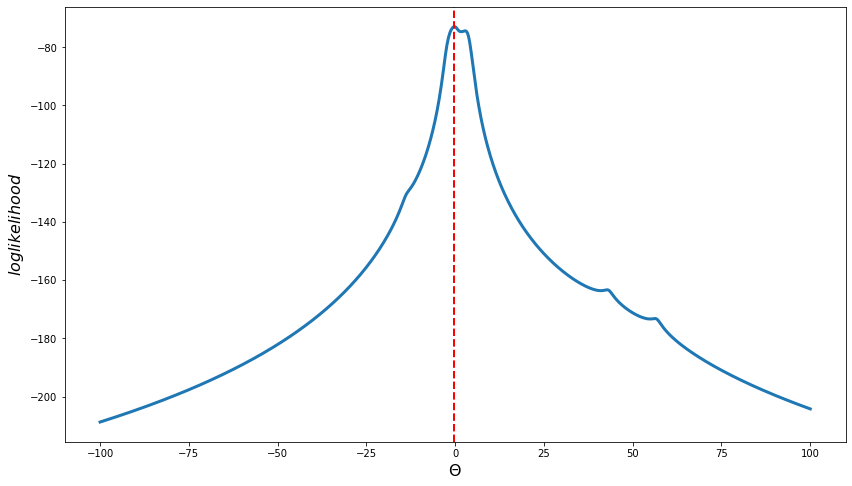

In [14]:
x = theta0
y = loglikelihood(f_x,x0,theta0)
plt.figure(figsize=(14,8))
plt.plot(x,y,linewidth=3)
plt.xlabel('${\Theta}$',weight='bold',fontsize=16)
plt.ylabel('$loglikelihood$',weight='bold',fontsize=16)
plt.axvline(x=-0.192286511918108,linewidth=2,color='r', linestyle='--')

#### Define Likelihood function for Cauchy

In [15]:
def lglklihd(x0):
    l = 1
    t = sym.Symbol('t')
    for i in range(0,len(x0)):
        l *= 1/(np.pi*(1+(x0[i]-t)**2))
    return log(l)

#### Compute f', f" for Newton's Method

In [16]:
f_t = lglklihd(x0)
t = sym.Symbol('t')
fprime = sym.diff(f_t)
fzegond = sym.diff(fprime)
h = -fprime/fzegond
f = lambdify(t, h, 'numpy')
g = lambdify(t,fprime, 'numpy')
k = lambdify(t,fzegond, 'numpy')

### Newton's Method

In [17]:
def Newton(f,g,a,eps):
    i=0
    while abs(g(a))>eps:
        a = a+f(a)
        i+=1
    print('Number of iteration = {}'.format(i))
    print('The maximum of f(\u03B8) with respect to \u03B8 is achieved at {}'.format(a))
    return a

In [18]:
Newton(f,g,-11,1e-3)

Number of iteration = 13
The maximum of f(θ) with respect to θ is achieved at -51318.900080670166


-51318.900080670166

In [19]:
Newton(f,g,-1,1e-6)

Number of iteration = 3
The maximum of f(θ) with respect to θ is achieved at -0.19228646762465892


-0.19228646762465892

In [20]:
Newton(f,g,0,1e-6)

Number of iteration = 3
The maximum of f(θ) with respect to θ is achieved at -0.19228661322559568


-0.19228661322559568

In [21]:
Newton(f,g,1.5,1e-6)

Number of iteration = 4
The maximum of f(θ) with respect to θ is achieved at 1.7135868348079184


1.7135868348079184

In [22]:
Newton(f,g,4,1e-6)

Number of iteration = 4
The maximum of f(θ) with respect to θ is achieved at 2.817472436888747


2.817472436888747

In [23]:
start_time = time.time()
Newton(f,g,4.7,1e-6)
Newton_time = time.time() - start_time
print(" Elapsed time in seconds: {}" .format(Newton_time))

Number of iteration = 4
The maximum of f(θ) with respect to θ is achieved at -0.192286511918108
 Elapsed time in seconds: 0.012995719909667969


In [24]:
Newton(f,g,7,1e-6)

Number of iteration = 8
The maximum of f(θ) with respect to θ is achieved at 41.04084782103564


41.04084782103564

In [25]:
Newton(f,g,8,1e-6)

Number of iteration = 1640
The maximum of f(θ) with respect to θ is achieved at -20011263.285425227


-20011263.285425227

In [26]:
Newton(f,g,38,1e-6)

Number of iteration = 4
The maximum of f(θ) with respect to θ is achieved at 42.79537785366718


42.79537785366718

#### Newton's result for the mean of the data

In [27]:
Newton(f,g,np.mean(x0),1e-6)

Number of iteration = 8
The maximum of f(θ) with respect to θ is achieved at 54.876617911716785


54.876617911716785

It seems that mean of the data is not a good starting point for Newton's method. The Maximum is around zero (-0.192286511918108) but we have some local maximum wihch are far from zero. The results are sensetive to the starting point and as we select starting point far from the global maximum we get the wrong estimate.

#### Lets Plot the $l'(\theta)$

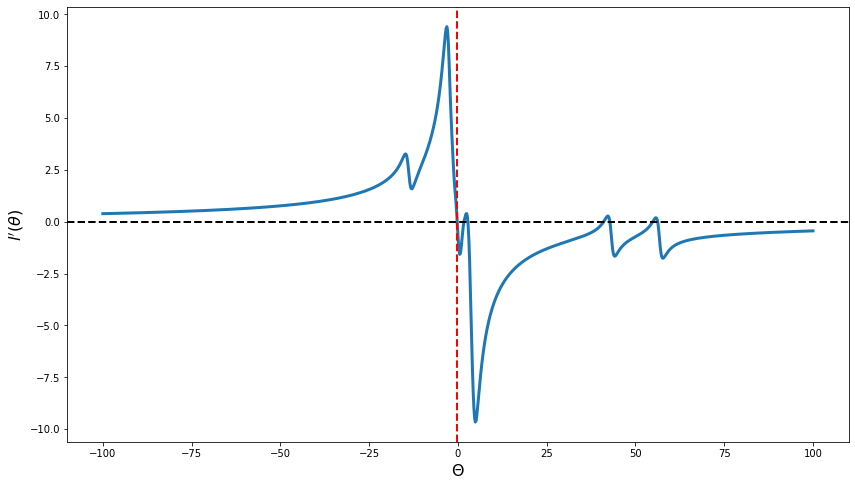

In [28]:
x = theta0
y = g(theta0)
plt.figure(figsize=(14,8))
plt.plot(x,y,linewidth=3)
plt.xlabel('${\Theta}$',weight='bold',fontsize=16)
plt.ylabel("$l'(\u03B8)$",weight='bold',fontsize=16)
plt.axhline(y=0,linewidth=2,color='k', linestyle='--')
plt.axvline(x=-0.192286511918108,linewidth=2,color='r', linestyle='--')

Lets plot the $l''(\theta)$ to see if the double prime is negative for the root or not

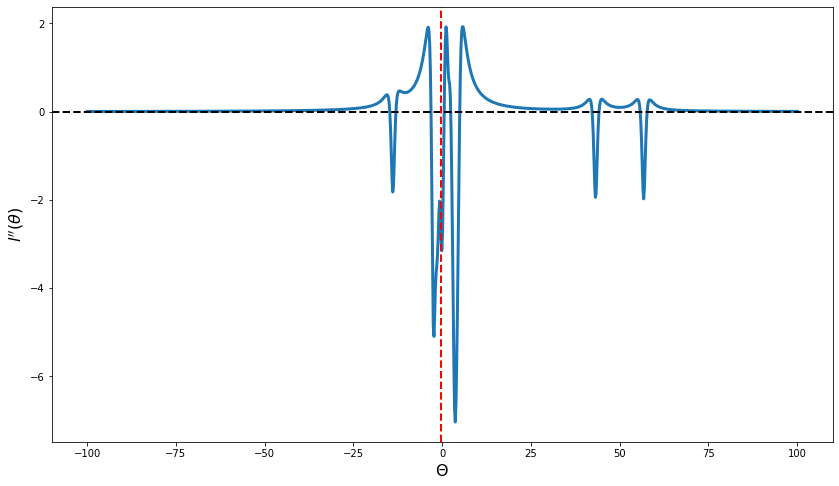

In [29]:
x = theta0
y = k(theta0)
plt.figure(figsize=(14,8))
plt.plot(x,y,linewidth=3)
plt.xlabel('${\Theta}$',weight='bold',fontsize=16)
plt.ylabel("$l''(\u03B8)$",weight='bold',fontsize=16)
plt.axhline(y=0,linewidth=2,color='k', linestyle='--')
plt.axvline(x=-0.192286511918108,linewidth=2,color='r', linestyle='--')

### b.

### Bisection Method

In [30]:
def bisection(f,a,b,eps):
    i=1
    while abs(a-b)>eps:
        c = a+(b-a)/2
        if f(c)*f(a)<0:
            b = c
        else:
            a = c
        i+=1
    print('Number of iteration = {}'.format(i))
    print('The maximum of f(\u03B8) with respect to \u03B8 is achieved at {}'.format(c))

- Bisection with starting point [-1,1]

In [31]:
start_time = time.time()
bisection(g,-1,1,1e-6)
bisection_time = time.time() - start_time
print(" Elapsed time in seconds: {}" .format(bisection_time))

Number of iteration = 22
The maximum of f(θ) with respect to θ is achieved at -0.19228649139404297
 Elapsed time in seconds: 0.004990816116333008


- Starting point [-1,4.5] in which Bisection Method fails

In [32]:
bisection(g,-1,4.5,1e-6)

Number of iteration = 24
The maximum of f(θ) with respect to θ is achieved at 2.817472755908966


### c.

### Fixed Point

In [33]:
def fixed_point(func,x0,alpha,eps,max_iter):
    i=0
    while abs(func(x0)) > eps:
        x0 = x0 + alpha*func(x0)
        i+=1
        if i>max_iter:
            print('Iteration exceeds {}, select new \u03B1'.format(max_iter))
            break
    print('Number of iteration = {}'.format(i))
    print('The maximum of f(\u03B8) with respect to \u03B8 is achieved at {}'.format(x0))
    return x0
        

- For $\alpha = 1$ and starting point at -1

In [34]:
fixed_point(g,-1,1,1e-6,10000)

Iteration exceeds 10000, select new α
Number of iteration = 10001
The maximum of f(θ) with respect to θ is achieved at -1.015663199178444


-1.015663199178444

- For $\alpha = 0.64$ and starting point at -1

In [35]:
start_time = time.time()
fixed_point(g,-1,0.64,1e-6,10000)
fixed_point_time = time.time() - start_time
print(" Elapsed time in seconds: {}" .format(fixed_point_time))

Number of iteration = 455
The maximum of f(θ) with respect to θ is achieved at -0.19228628934009448
 Elapsed time in seconds: 0.08796167373657227


- For $\alpha = 0.25$ and starting point at -1

In [36]:
fixed_point(g,-1,0.25,1e-6,10000)

Number of iteration = 11
The maximum of f(θ) with respect to θ is achieved at -0.1922868327511721


-0.1922868327511721

- For $\alpha = 0.5$ and starting point at -2

In [37]:
fixed_point(g,-2,0.5,1e-6,10000)

Number of iteration = 23
The maximum of f(θ) with respect to θ is achieved at -0.19228685664037476


-0.19228685664037476

- For $\alpha = 0.4$ and starting point at -2

In [38]:
fixed_point(g,-2,0.4,1e-6,10000)

Number of iteration = 11
The maximum of f(θ) with respect to θ is achieved at -0.19228648839490692


-0.19228648839490692

- For $\alpha = 0.3$ and starting point at -2

In [39]:
fixed_point(g,-2,0.3,1e-6,10000)

Number of iteration = 7
The maximum of f(θ) with respect to θ is achieved at -0.192286689991843


-0.192286689991843

- For $\alpha = 0.2$ and starting point at -2

In [40]:
fixed_point(g,-2,0.2,1e-6,10000)

Number of iteration = 18
The maximum of f(θ) with respect to θ is achieved at -0.19228673781762923


-0.19228673781762923

#### d.

### Secant Method

In [41]:
def secant(func,x0,x1,eps):
    i=1
    while abs(func(x1))>eps:
        x2 = x1 - func(x1)*(x1-x0)/(func(x1)-func(x0))
        x0 = x1
        x1 = x2
        i+=1
    print('Number of iteration = {}'.format(i))
    print('The maximum of f(\u03B8) with respect to \u03B8 is achieved at {}'.format(x2))
    return x2
    

- For starting point [-2,-1]

In [42]:
start_time = time.time()
secant(g,-2,-1,1e-6)
secant_time = time.time() - start_time
print(" Elapsed time in seconds: {}" .format(secant_time))

Number of iteration = 6
The maximum of f(θ) with respect to θ is achieved at -0.1922864937141208
 Elapsed time in seconds: 0.0020084381103515625


- For starting point [-3,3]

In [43]:
secant(g,-3,3,1e-6)

Number of iteration = 7
The maximum of f(θ) with respect to θ is achieved at 2.817472169714576


2.817472169714576

Secant method is also sensetive to initial values and it gives wrong answer for [-3,3]

#### e.

#### Speed and Stability

According to the time computed in part "d" the fastest methods for finding the maximum in this example are Secant, Bisection, Newton and Fixed Point accordingly. However, this can change by the initial value selection and the number of local maximum that a specific function has. 

In [44]:
print(" Elapsed time at Secant Method in seconds: {}" .format(secant_time))
print(" Elapsed time at Bisection Method in seconds: {}" .format(bisection_time))
print(" Elapsed time at Newton's Method in seconds: {}" .format(Newton_time))
print(" Elapsed time at Fixed Point Method in seconds: {}" .format(fixed_point_time))

 Elapsed time at Secant Method in seconds: 0.0020084381103515625
 Elapsed time at Bisection Method in seconds: 0.004990816116333008
 Elapsed time at Newton's Method in seconds: 0.012995719909667969
 Elapsed time at Fixed Point Method in seconds: 0.08796167373657227


#### For Normal Distribution $N(\theta,1)$

$$f(x) = \frac{1}{\sqrt{2\pi}}exp{\frac{{-(x-\theta)}^2}{2}}$$

In [45]:
x0= np.random.normal(3, 1, 20)

#### Likelihood Function Graph

In [46]:
theta0 = np.linspace(-100,100, num=1000)
x = sym.Symbol('x')
theta = sym.Symbol('t')
f = exp(-(x-theta)**2/2)/sqrt(2*np.pi)
f_x = lambdify([x,theta], f, 'numpy')
f

0.398942280401433*exp(-(-t + x)**2/2)

#### Lets Plot the loglikwlihood function

Text(0, 0.5, '$loglikelihood$')

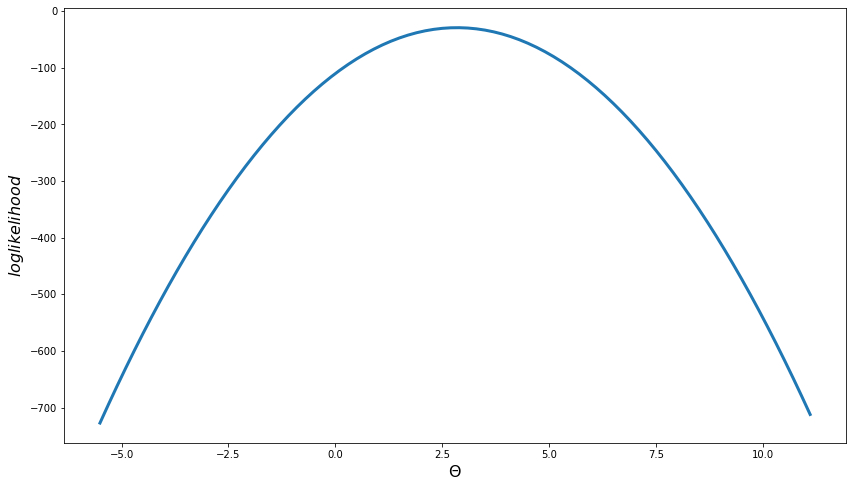

In [47]:
x = theta0
y = loglikelihood(f_x,x0,theta0)
plt.figure(figsize=(14,8))
plt.plot(x,y,linewidth=3)
plt.xlabel('${\Theta}$',weight='bold',fontsize=16)
plt.ylabel('$loglikelihood$',weight='bold',fontsize=16)

#### Define the Loglikelihood function

In [48]:
def lglklihd_N(x0):
    l = 1
    t = sym.Symbol('t')
    for i in range(0,len(x0)):
        l *= exp(-(x0[i]-t)**2/2)/sqrt(2*np.pi)
    return log(l)

#### Compute f and f'

In [49]:
f_t = lglklihd_N(x0)
t = sym.Symbol('t')
fprime = sym.diff(f_t)
fzegond = sym.diff(fprime)
h = -fprime/fzegond
f = lambdify(t, h, 'numpy')
g = lambdify(t,fprime, 'numpy')

### Newton's Method

In [50]:
start_time = time.time()
Newton(f,g,1,1e-3)
Newton_time = time.time() - start_time
print(" Elapsed time in seconds: {}" .format(Newton_time))

Number of iteration = 1
The maximum of f(θ) with respect to θ is achieved at 2.84840524874396
 Elapsed time in seconds: 0.02198648452758789


### Bisection Method

In [51]:
start_time = time.time()
bisection(g,-5,5,1e-6)
bisection_time = time.time() - start_time
print(" Elapsed time in seconds: {}" .format(bisection_time))

Number of iteration = 25
The maximum of f(θ) with respect to θ is achieved at 2.8484052419662476
 Elapsed time in seconds: 0.023003101348876953


### Fixed Point Method

In [52]:
start_time = time.time()
fixed_point(g,3,0.3,1e-6,10000)
fixed_point_time = time.time() - start_time
print(" Elapsed time in seconds: {}" .format(fixed_point_time))

Number of iteration = 3
The maximum of f(θ) with respect to θ is achieved at -16.100938658248417
 Elapsed time in seconds: 0.0059964656829833984


### Secant Method

In [53]:
start_time = time.time()
secant(g,-5,3,1e-6)
secant_time = time.time() - start_time
print(" Elapsed time in seconds: {}" .format(secant_time))

Number of iteration = 2
The maximum of f(θ) with respect to θ is achieved at 2.8484052487440614
 Elapsed time in seconds: 0.003000497817993164


- Except Fixed Point mehtod, other methods can easily compute the global maximum for the normal distribution.t
Fixed Point method seems to be the fastest method but it failed to find the maximum. However, secant method reaches to the general maximum faster than other methods. This can change by the initial value selection and the number of local maximum that a specific function has. 

### Q3.

### Gamma(2,1):
$$f(x) = {x}e^{-x}$$

In [54]:
def f_w(lt):
    return dist.ppf(0.95 + lt) - dist.ppf(lt)
dist = gamma(2)
# fmin minimizes a function using the downhill simplex algorithm.
Low_tail = fmin(f_w,0.05)[0]
dist.ppf([Low_tail,0.95+Low_tail])

Optimization terminated successfully.
         Current function value: 4.722806
         Iterations: 15
         Function evaluations: 30


C:\ProgramData\Anaconda\lib\site-packages\scipy\optimize\optimize.py:578: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[0]:
C:\ProgramData\Anaconda\lib\site-packages\scipy\optimize\optimize.py:589: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-2]:
C:\ProgramData\Anaconda\lib\site-packages\scipy\optimize\optimize.py:594: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-1]:
C:\ProgramData\Anaconda\lib\site-packages\scipy\optimize\optimize.py:582: RuntimeWarning: invalid value encountered in less
  if fxe < fxr:


array([0.04204185, 4.76484798])

#### Lets Plot the Gamma(2,1) probability density function with 95% lower and upper quantile

Text(9, 0.4, '$Gamma(2,1)$')

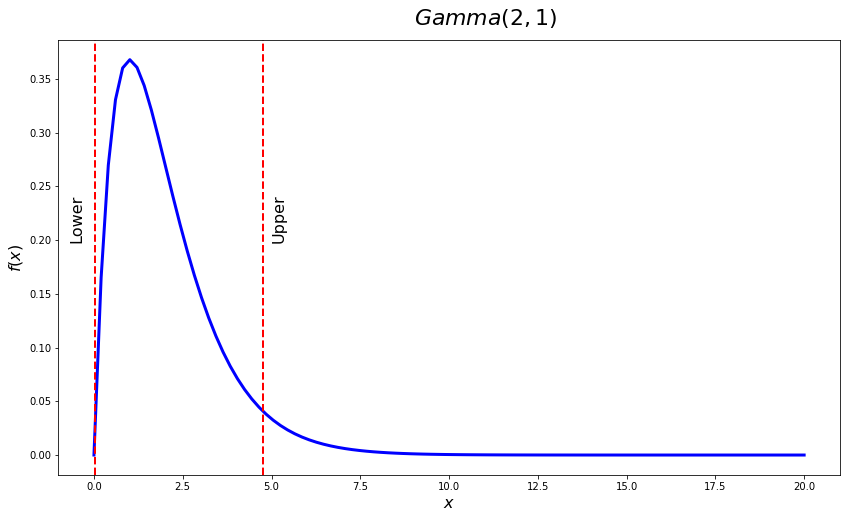

In [55]:
x0 = np.linspace(0,20, 100)
x = sym.Symbol('x')
gamm = x*exp(-x)
y = lambdify(x, gamm, 'numpy')
plt.figure(figsize=(14,8))
plt.plot(x0, y(x0),'b-', lw=3)
plt.xlabel('${x}$',weight='bold',fontsize=16)
plt.ylabel('$f(x)$',weight='bold',fontsize=16)
plt.axvline(x=0.04204185,linewidth=2,color='r', linestyle='--')
plt.axvline(x=4.76484798,linewidth=2,color='r', linestyle='--')
plt.text(-0.7, 0.2, 'Lower', fontsize=16,rotation=90)
plt.text(5, 0.2, 'Upper', fontsize=16,rotation=90)
plt.text(9, 0.4, r'$Gamma(2,1)$', weight='bold',fontsize=22)

#### The region under the density curve and above the 95% highest posterior density interval.

Text(9, 0.4, '$Gamma(2,1)$')

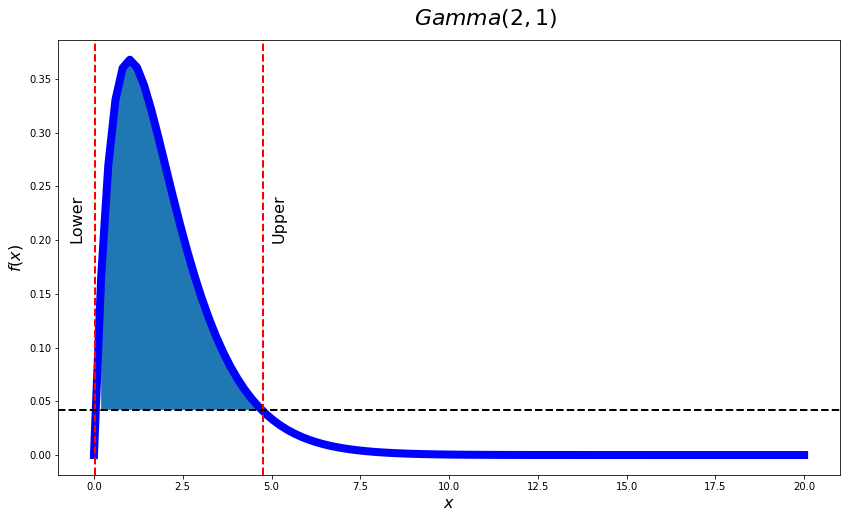

In [56]:
plt.figure(figsize=(14,8))
plt.plot(x0, y(x0),'b-', lw=8)
plt.xlabel('${x}$',weight='bold',fontsize=16)
plt.ylabel('$f(x)$',weight='bold',fontsize=16)
plt.axvline(x=0.04204185,linewidth=2,color='r', linestyle='--')
plt.axvline(x=4.76484798,linewidth=2,color='r', linestyle='--')
plt.text(-0.7, 0.2, 'Lower', fontsize=16,rotation=90)
plt.text(5, 0.2, 'Upper', fontsize=16,rotation=90)
plt.axhline(y=0.04204185,linewidth=2,color='k', linestyle='--')
plt.fill_between(x0, 0.04204185, y(x0),where=y(x0) >= 0.04204185)
plt.text(9, 0.4, r'$Gamma(2,1)$', weight='bold',fontsize=22)